In [1]:
import os 
import re
import pickle
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io 
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
from daily_behavioral_monitoring import *

load_data = load_behavioral_data()
plot_data = plot_behavioral_data()

In [3]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Single Session

In [10]:
# Define the base directory where the behavior data is stored
base_directory = '/Volumes/Runyan5/Akhil/behavior/'

In [11]:
mouse_ids = ['CBJB-2-1L'] #Need to add experimenter ID (i.e. AB, CB, JM, etc.)
date = '250325' #Need to add date in format YYMMDD

In [13]:
# Get data for the sessin for this animal 

results = load_data.get_behavior_data_single_session_all_animals(mouse_ids, date,  base_directory)

Base directory: /Volumes/Runyan5/Akhil/behavior/

Processing mouse: CBJB-2-1L
Looking in directory: /Volumes/Runyan5/Akhil/behavior/CBJB-2-1L/
Looking for pattern: CBJB-2-1L_250325_Cell
Found 148 .mat files:
  CBJB-2-1L_250121.mat
  CBJB-2-1L_250121_Cell.mat
  CBJB-2-1L_250123_Cell.mat
  CBJB-2-1L_250122.mat
  CBJB-2-1L_250122_Cell.mat
  CBJB-2-1L_250123_1.mat
  CBJB-2-1L_250123_Cell_1.mat
  CBJB-2-1L_250123.mat
  CBJB-2-1L_250124_Cell.mat
  CBJB-2-1L_250128.mat
  CBJB-2-1L_250128_Cell.mat
  CBJB-2-1L_250127.mat
  CBJB-2-1L_250127_Cell.mat
  CBJB-2-1L_250124.mat
  CBJB-2-1L_250129_Cell.mat
  CBJB-2-1L_250204.mat
  CBJB-2-1L_250204_Cell.mat
  CBJB-2-1L_250203.mat
  CBJB-2-1L_250203_Cell.mat
  CBJB-2-1L_250131.mat
  CBJB-2-1L_250131_Cell.mat
  CBJB-2-1L_250130.mat
  CBJB-2-1L_250130_Cell.mat
  CBJB-2-1L_250129.mat
  CBJB-2-1L_250205_Cell.mat
  CBJB-2-1L_250213.mat
  CBJB-2-1L_250213_Cell.mat
  CBJB-2-1L_250212_1.mat
  CBJB-2-1L_250212_Cell_1.mat
  CBJB-2-1L_250212.mat
  CBJB-2-1L_250212_

In [14]:
# Process results
#for mouse_id, data in results.items():
#    if data['error'] is None:
#        print(f"\nMouse {mouse_id}:")
#        print(f"Number of trials: {len(data['df'])}")
#        print(f"Average performance: {data['df']['outcome'].mean()*100:.1f}%")
#    else:
#        print(f"\nMouse {mouse_id}: Error - {data['error']}")


Processing mouse: CBJB-2-1L
Looking in directory: /Volumes/Runyan5/Akhil/behavior/CBJB-2-1L/
Looking for pattern: CBJB-2-1L_250325_Cell
Found 148 .mat files:
  CBJB-2-1L_250121.mat
  CBJB-2-1L_250121_Cell.mat
  CBJB-2-1L_250123_Cell.mat
  CBJB-2-1L_250122.mat
  CBJB-2-1L_250122_Cell.mat
  CBJB-2-1L_250123_1.mat
  CBJB-2-1L_250123_Cell_1.mat
  CBJB-2-1L_250123.mat
  CBJB-2-1L_250124_Cell.mat
  CBJB-2-1L_250128.mat
  CBJB-2-1L_250128_Cell.mat
  CBJB-2-1L_250127.mat
  CBJB-2-1L_250127_Cell.mat
  CBJB-2-1L_250124.mat
  CBJB-2-1L_250129_Cell.mat
  CBJB-2-1L_250204.mat
  CBJB-2-1L_250204_Cell.mat
  CBJB-2-1L_250203.mat
  CBJB-2-1L_250203_Cell.mat
  CBJB-2-1L_250131.mat
  CBJB-2-1L_250131_Cell.mat
  CBJB-2-1L_250130.mat
  CBJB-2-1L_250130_Cell.mat
  CBJB-2-1L_250129.mat
  CBJB-2-1L_250205_Cell.mat
  CBJB-2-1L_250213.mat
  CBJB-2-1L_250213_Cell.mat
  CBJB-2-1L_250212_1.mat
  CBJB-2-1L_250212_Cell_1.mat
  CBJB-2-1L_250212.mat
  CBJB-2-1L_250212_Cell.mat
  CBJB-2-1L_250211.mat
  CBJB-2-1L_25021

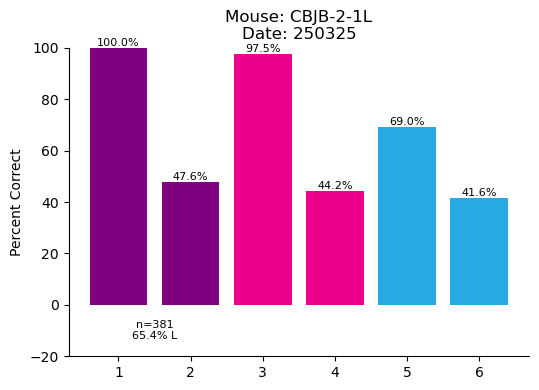

(<Figure size 1500x400 with 1 Axes>,
 array([<Axes: title={'center': 'Mouse: CBJB-2-1L\nDate: 250325'}, ylabel='Percent Correct'>,
        <Axes: >, <Axes: >], dtype=object))

In [17]:
plot_data.plot_behavior_single_session(mouse_ids, date)

# Multiple Sessions

In [18]:
# Define the base directory where the behavior data is stored
base_directory = '/Volumes/Runyan5/Akhil/behavior/'

In [19]:
# Define a list of mouse IDs + remember you need to add experimenter ID (i.e. AB, CB, JM, etc.)

mouse_ids = ['CBIX-5-1R','CBIX-1-00',
             'CBJB-1-00', 'CBJB-2-1L',
             'ABJB-4-00', 'ABJB-5-1L', 
             'ABJB-6-1R'
             ]

In [20]:
# Process results
#for mouse_id, data in results.items():
#    if data['error'] is None:
#        print(f"\nMouse {mouse_id}:")
#        print(f"Number of sessions: {len(data['sorted_dates'])}")
#        print(f"Session dates: {', '.join(data['sorted_dates'])}")
#        print(f"Total number of trials: {len(data['df'])}")
#        print(f"Average performance across sessions: {data['df']['outcome'].mean()*100:.1f}%")
        
#        # Print performance by session
#        for date in data['sorted_dates']:
#            session_data = data['df'][data['df']['date'] == date]
#            print(f"  Session {date}: {len(session_data)} trials, "
#                  f"{session_data['outcome'].mean()*100:.1f}% correct")
#    else:
#        print(f"\nMouse {mouse_id}: Error - {data['error']}")


Processing mouse: CBIX-5-1R
Looking in directory: /Volumes/Runyan5/Akhil/behavior/CBIX-5-1R/
Looking for pattern: CBIX-5-1R_250317_Cell
Found 136 .mat files:
  CBIX-5-1R_241205_Cell.mat
  CBIX-5-1R_241205.mat
  CBIX-5-1R_241206.mat
  CBIX-5-1R_241206_Cell.mat
  CBIX-5-1R_241203.mat
  CBIX-5-1R_241203_Cell.mat
  CBIX-5-1R_241212_Cell.mat
  CBIX-5-1R_241212.mat
  CBIX-5-1R_250109_2.mat
  CBIX-5-1R_250109_Cell_2.mat
  CBIX-5-1R_250113.mat
  CBIX-5-1R_250113_Cell.mat
  CBIX-5-1R_250115.mat
  CBIX-5-1R_250115_Cell.mat
  CBIX-5-1R_250114.mat
  CBIX-5-1R_250114_Cell.mat
  CBIX-5-1R_250113_1.mat
  CBIX-5-1R_250113_Cell_1.mat
  CBIX-5-1R_250116_Cell_1.mat
  CBIX-5-1R_250116_1.mat
  CBIX-5-1R_250121_Cell.mat
  CBIX-5-1R_250121.mat
  CBIX-5-1R_250122_Cell.mat
  CBIX-5-1R_250123.mat
  CBIX-5-1R_250123_Cell.mat
  CBIX-5-1R_250122.mat
  CBIX-5-1R_250124.mat
  CBIX-5-1R_250124_Cell.mat
  CBIX-5-1R_250128.mat
  CBIX-5-1R_250128_Cell.mat
  CBIX-5-1R_250127.mat
  CBIX-5-1R_250127_Cell.mat
  CBIX-5-1R_2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Processing mouse: ABJB-4-00
Looking in directory: /Volumes/Runyan5/Akhil/behavior/ABJB-4-00/
Looking for pattern: ABJB-4-00_250319_Cell
Found 58 .mat files:
  ABJB-4-00_250204_Cell.mat
  ABJB-4-00_250129.mat
  ABJB-4-00_250129_Cell.mat
  ABJB-4-00_250130.mat
  ABJB-4-00_250130_Cell.mat
  ABJB-4-00_250131.mat
  ABJB-4-00_250131_Cell.mat
  ABJB-4-00_250204.mat
  ABJB-4-00_250205.mat
  ABJB-4-00_250205_Cell.mat
  ABJB-4-00_250206.mat
  ABJB-4-00_250206_Cell.mat
  ABJB-4-00_250211_Cell.mat
  ABJB-4-00_250211.mat
  ABJB-4-00_250212_Cell.mat
  ABJB-4-00_250213.mat
  ABJB-4-00_250213_Cell.mat
  ABJB-4-00_250212.mat
  ABJB-4-00_250218_Cell.mat
  ABJB-4-00_250218.mat
  ABJB-4-00_250217_Cell.mat
  ABJB-4-00_250217_1.mat
  ABJB-4-00_250217_Cell_1.mat
  ABJB-4-00_250217.mat
  ABJB-4-00_250220.mat
  ABJB-4-00_250220_Cell.mat
  ABJB-4-00_250219.mat
  ABJB-4-00_250219_Cell.mat
  ABJB-4-00_250225_Cell.mat
  ABJB-4-00_250227.mat
  ABJB-4-00_250227_Cell.mat
  ABJB-4-00_250226.mat
  ABJB-4-00_250226_Cel

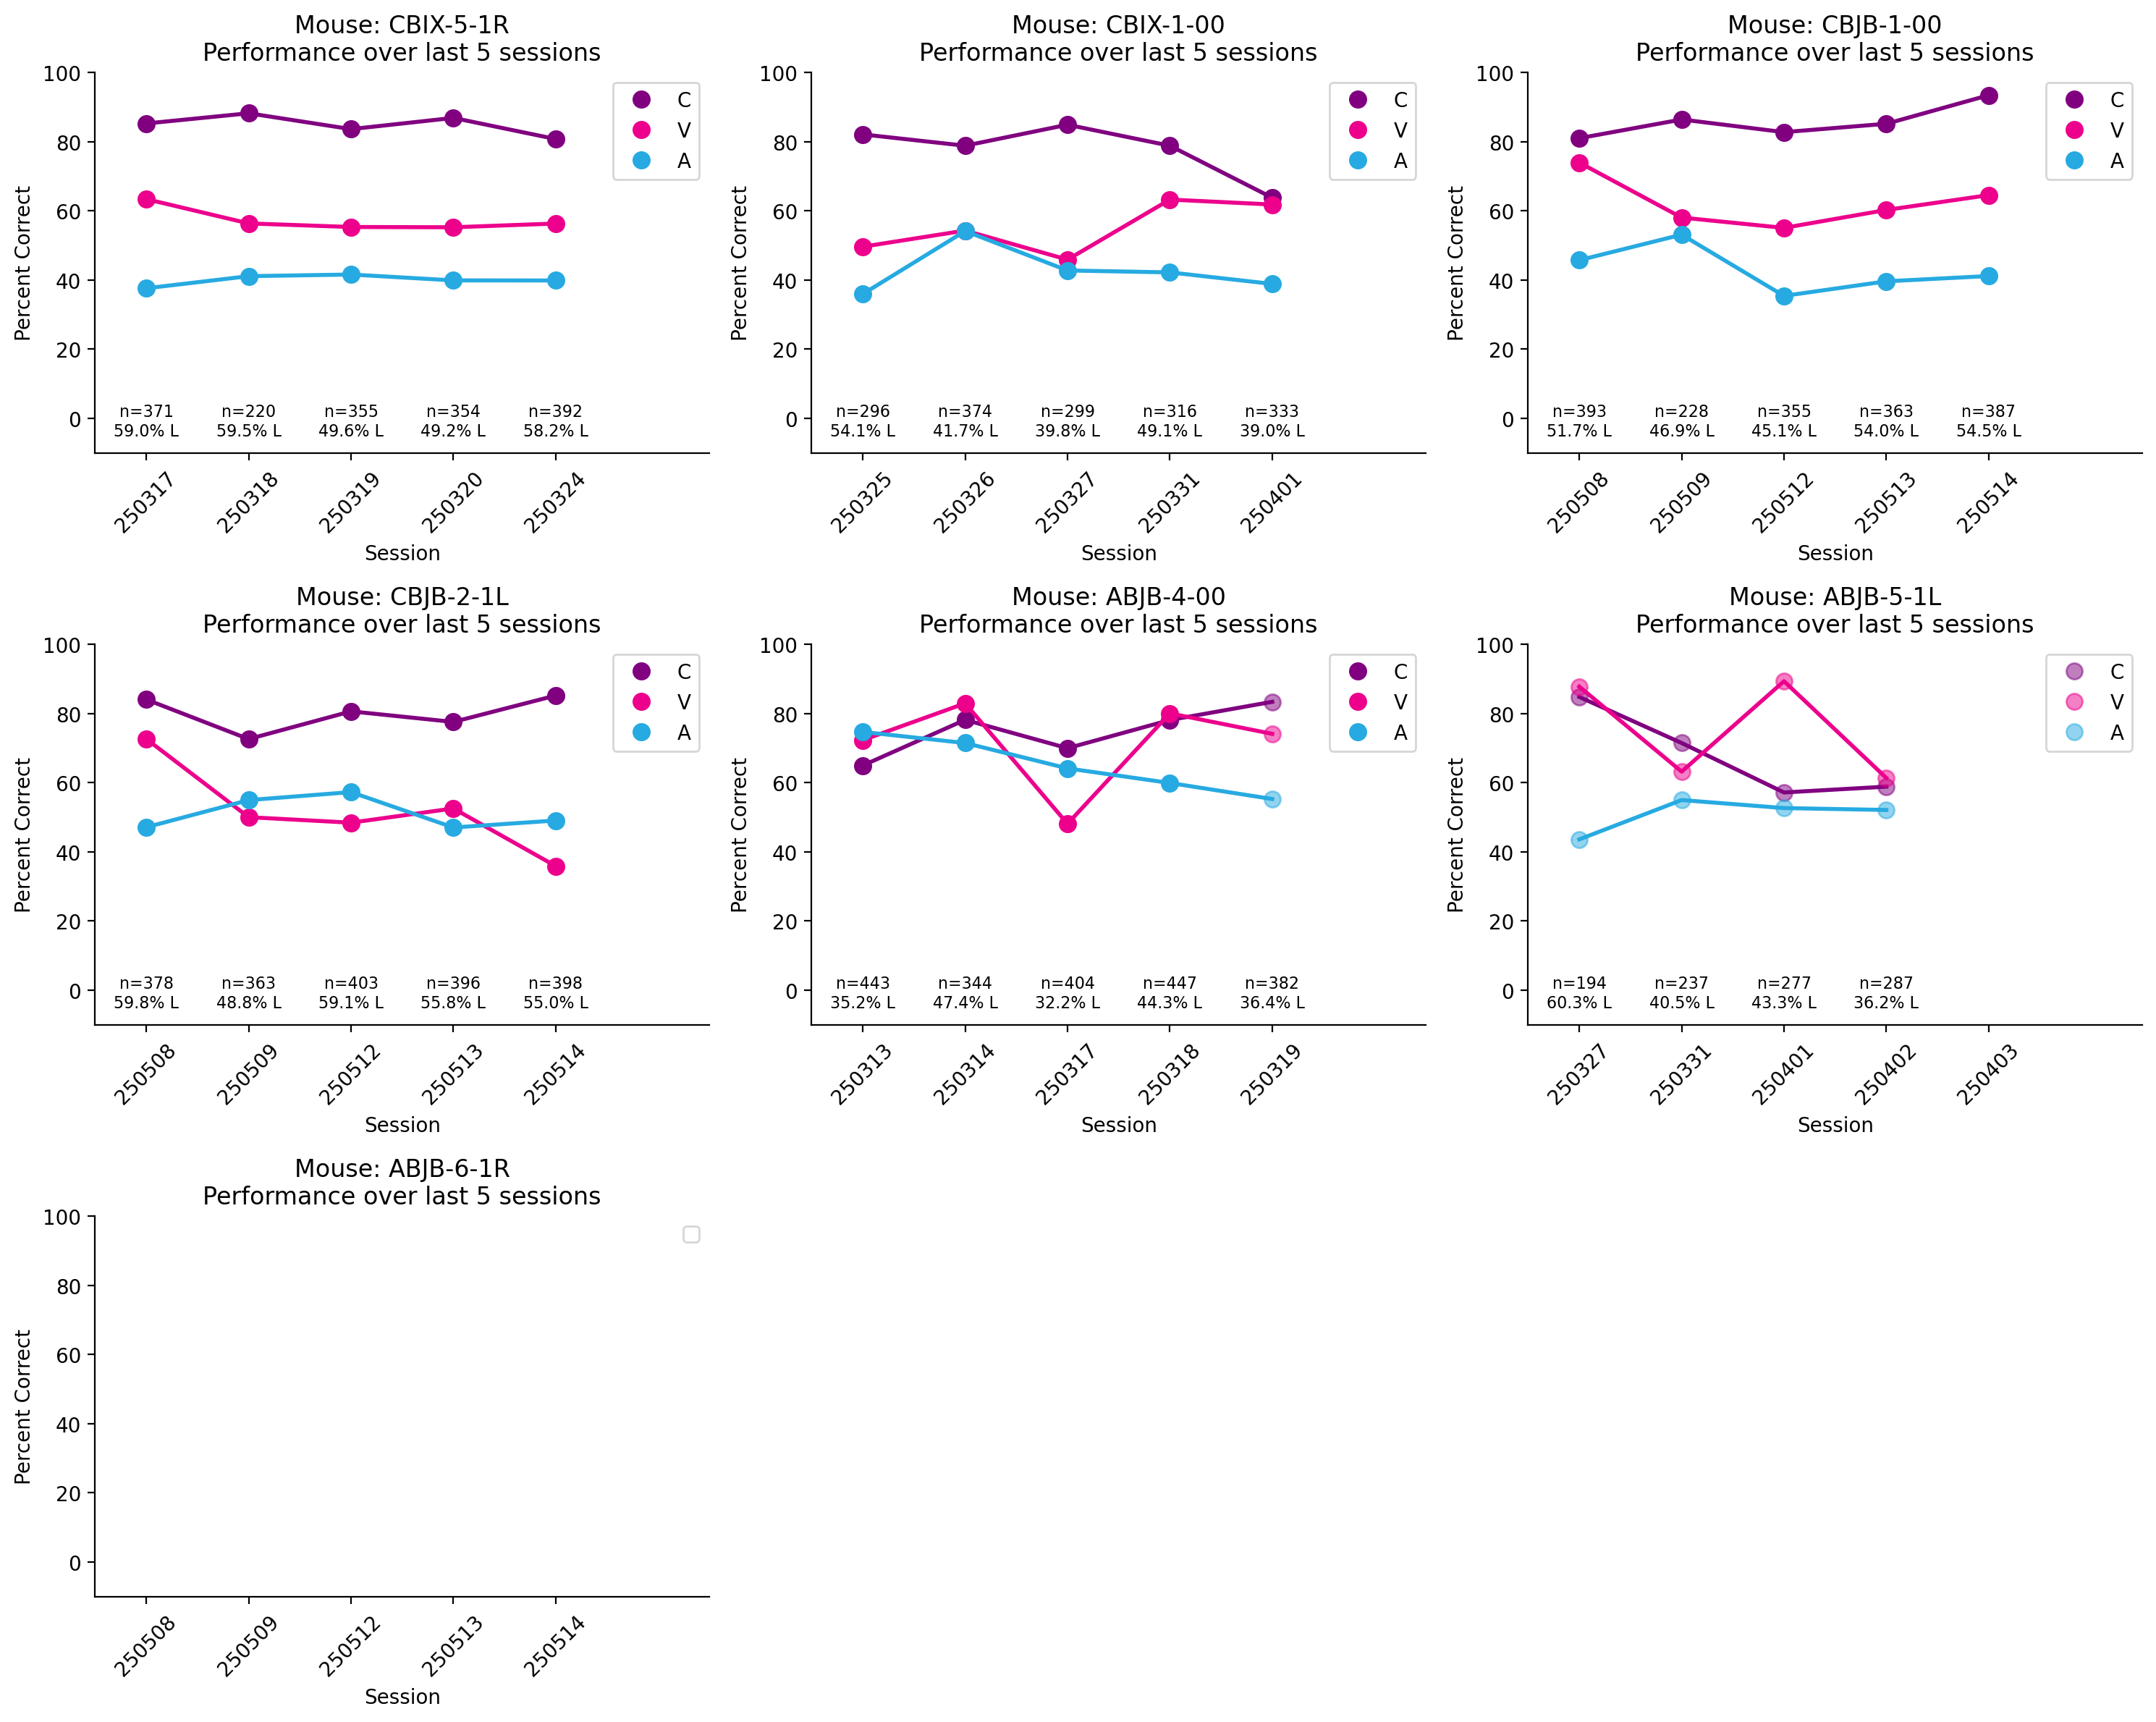

(<Figure size 3000x2400 with 7 Axes>,
 array([<Axes: title={'center': 'Mouse: CBIX-5-1R\nPerformance over last 5 sessions'}, xlabel='Session', ylabel='Percent Correct'>,
        <Axes: title={'center': 'Mouse: CBIX-1-00\nPerformance over last 5 sessions'}, xlabel='Session', ylabel='Percent Correct'>,
        <Axes: title={'center': 'Mouse: CBJB-1-00\nPerformance over last 5 sessions'}, xlabel='Session', ylabel='Percent Correct'>,
        <Axes: title={'center': 'Mouse: CBJB-2-1L\nPerformance over last 5 sessions'}, xlabel='Session', ylabel='Percent Correct'>,
        <Axes: title={'center': 'Mouse: ABJB-4-00\nPerformance over last 5 sessions'}, xlabel='Session', ylabel='Percent Correct'>,
        <Axes: title={'center': 'Mouse: ABJB-5-1L\nPerformance over last 5 sessions'}, xlabel='Session', ylabel='Percent Correct'>,
        <Axes: title={'center': 'Mouse: ABJB-6-1R\nPerformance over last 5 sessions'}, xlabel='Session', ylabel='Percent Correct'>,
        <Axes: >, <Axes: >], dtype=obj

In [21]:
plot_data.plot_behavior_across_sessions(mouse_ids, base_directory, verbose=False)